<a href="https://colab.research.google.com/github/kubbu2001/BT19ECE029-DIP-Lab/blob/main/DIP_Assignment_10_Histogram_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No of Channel is: 3
No of Channel is: 3


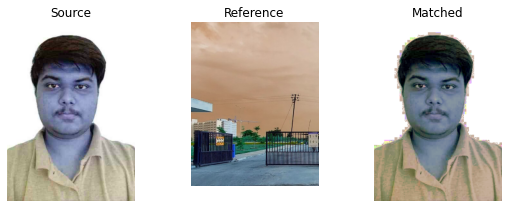

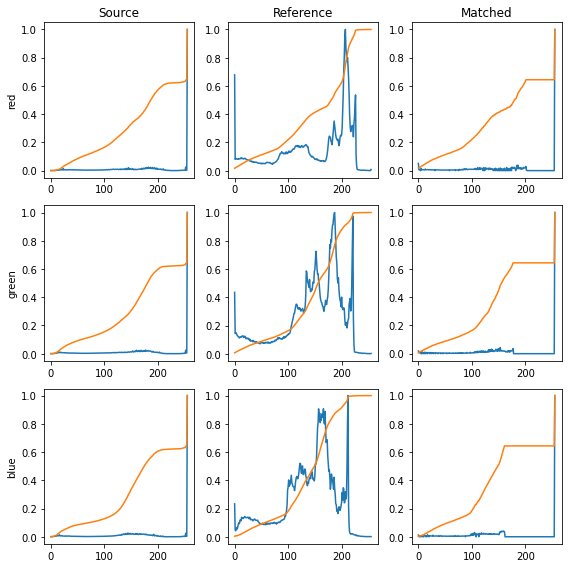

In [2]:
# import packages
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

# reading main image
img1 = cv2.imread("/content/T (2).jpg")

# checking the number of channels
print('No of Channel is: ' + str(img1.ndim))

# reading reference image
img2 = cv2.imread("/content/IIIT-Nagpur.jpg")

# checking the number of channels
print('No of Channel is: ' + str(img2.ndim))

image = img1
reference = img2

matched = match_histograms(image, reference ,
						multichannel=True)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
									figsize=(8, 3),
									sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
	aa.set_axis_off()

ax1.imshow(img1)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for i, img in enumerate((image, reference, matched)):
	for c, c_color in enumerate(('red', 'green', 'blue')):
		img_hist, bins = exposure.histogram(img[..., c],
											source_range='dtype')
		axes[c, i].plot(bins, img_hist / img_hist.max())
		img_cdf, bins = exposure.cumulative_distribution(img[..., c])
		axes[c, i].plot(bins, img_cdf)
		axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()